## SAP SIGNAVIO Test Assignment

From the BPMN based process models, find the identifier, count, and relative amount (%) of process models with:
- No start event
- Several start events
- No end event
- Several end events
- No start event, but with one or several tasks that can be considered to be the first activity in the process model

In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd

from sapsam import parser, constants

The CSV files are imported and parsed.

In [3]:
csv_paths = parser.get_csv_paths()
rel_parser = parser.BpmnModelParser(parse_outgoing=True)
#df_rel = rel_parser.parse_model_elements(csv_paths)
df_rel = rel_parser.parse_model_elements(csv_paths=csv_paths[:103])



100%|██████████| 103/103 [31:15<00:00, 18.20s/it]


In [4]:
# get models metadata to double check if all uploaded models are BPMN 2.0. and filter others. 
df_meta = parser.parse_model_metadata()

100%|██████████| 103/103 [04:36<00:00,  2.69s/it]


In [5]:
#As staterd in documentation to distriguish between model notations we should check Namespace
df_filtered = df_meta[df_meta['namespace'] == 'http://b3mn.org/stencilset/bpmn2.0#']
mask = df_rel.index.get_level_values('model_id').isin(df_filtered.index.get_level_values('model_id'))
#Delete from dataframe with the parsed models, all models which are not BPMN 
df_rel_filtered = df_rel.loc[mask]

We group by model_id, that each line shows how many times each type of activity is represented in process model.

In [6]:
# grouping by model_id
df_cnts = (
    df_rel_filtered.groupby("model_id").category
    .value_counts()
    .to_frame("count")
    .unstack()
    .droplevel(0, axis='columns') # drop first level column level "count" that unstack produces
    .fillna(0, downcast="infer")
)
df_cnts

category,Association_Bidirectional,Association_Undirected,Association_Unidirectional,ChoreographyParticipant,ChoreographyTask,CollapsedEventSubprocess,CollapsedPool,CollapsedSubprocess,CollapsedVerticalPool,Communication,...,TextAnnotation,VerticalLane,VerticalPool,gdashedline,gdiamond,gdottedline,gellipse,grect,gtext,processparticipant
model_id,,,,,,,,,,,,,,,,,,,,,
0000150e890c45928d26584d491ada68,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00001f477e9a4fb1b9dcb27e029a426d,0,2,3,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
00003a67300748639e4bc21398bb5ede,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00005cea16fd426881c7f1619e30b804,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0000c3ea6c58407dbfaeac9ef5e467e7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffffc29ea95142e185189e9d35a51ad2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
ffffcd5186bf4655b510ec28d21f0dc3,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
ffffe3bf630542ef846c139be1af7469,0,2,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0


# No start event
To calculate how many models have no start event, we examine each model (i.e., each row in df_cnts) for the presence of any of the start event types in it. Since we have the number of each item in the process model, for no start event, each of the columns representing the start event must have a value of zero.

In [7]:
# calculate the sum of the events for each row for colomns which represent start event
event_cols = ['StartCompensationEvent', 'StartConditionalEvent', 'StartErrorEvent', 'StartEscalationEvent', 'StartMessageEvent', 'StartMultipleEvent', 'StartNoneEvent', 'StartParallelMultipleEvent', 'StartSignalEvent', 'StartTimerEvent']
event_sum = df_cnts[event_cols].sum(axis=1)

# create a boolean mask to filter the rows where the sum of events is equal to 0
mask_noStart = event_sum == 0

# count the number of rows that meet the mask condition i.e have no start event 
count = mask_noStart.sum()
noStart = df_cnts[mask_noStart]

# relative amount of models with no start event 
pct_noStart = round(noStart.shape[0] / df_cnts.shape[0], 4)
noStart = noStart.reset_index()
print("Amount of models without the start event: ", count)
print("Relative anouunt of models without the start event: ", "{:.2%}".format(pct_noStart))
print("List of model IDs without the start event:")
display(pd.DataFrame(noStart["model_id"]))


Amount of models without the start event:  16965
Relative anouunt of models without the start event:  2.80%
List of model IDs without the start event:


,model_id
0,0004069858ef468a92160033e14b0974
1,000d92570a724224afa417d9658f86fd
2,000f8a5f36ed4c77b9a922156d8f8837
3,00126f0b72ff42739bc60607219a539d
4,00135803292b43328aa1088dbe211962
...,...
16960,ffdad11d6adb48808f1e5fa3d3cc6e39
16961,ffded125fdc34ad49146bb0b02261eba
16962,ffe15036b3e24d92a11618e48d22c241
16963,fff2c4e5c12a41259b23ea90c24380c0


# Several start events

To calculate how many models have several start events, we examine each model (i.e., each row in df_cnts) for the presence of any of the start event types in it. Since we have the number of each item in the process model, for several start events, at least two of the columns representing the start event must have a value more than 0 (or one column should have a value > 1).

In [8]:
mask_startMulti = event_sum > 1

# count the number of rows that meet the mask condition i.e have more than one start event 
count_startMulti = mask_startMulti.sum()
multiStart = df_cnts[mask_startMulti]
# percentage of models with more than one start event 
pct_startMulti = round(multiStart.shape[0] / df_cnts.shape[0], 4)
print("Amount of models with multiple start events: ", count_startMulti)
print("Relative amount of modelswith multiple start events: ","{:.2%}".format(pct_startMulti))
print("List of model IDs with multiple start events:")
multiStart = multiStart.reset_index()
display(pd.DataFrame(multiStart["model_id"]))



Amount of models with multiple start events:  97915
Relative amount of modelswith multiple start events:  16.17%
List of model IDs with multiple start events:


,model_id
0,00005cea16fd426881c7f1619e30b804
1,0000c8488ca54f7cafe9556e9538defd
2,0001521f380f480e97abbc4ddc01d883
3,00019333b6d249119dbdc88e85c2ec36
4,000330b67ccb48e6a5dc8ffa3cfc7b4b
...,...
97910,fffba06563344ac98a1156b45fa1a49f
97911,fffbcaff196a42d18b933ff56c1133fa
97912,fffbcd3a06484e43a2f21e9060a31eea
97913,fffcbb8c15904bdb84bd9dfa9251be68


# No end event
To calculate how many models have no end event, we examine each model (i.e., each row in df_cnts) for the presence of any of the end event types in it. Since we have the number of each activity in the process model, for no end event, each of the columns representing the end event must have a value of zero.

In [9]:
#Names of the colomns, which represent end events 
end_event_cols = ['EndCancelEvent', 'EndCompensationEvent', 'EndErrorEvent', 'EndEscalationEvent', 'EndMessageEvent', 'EndMultipleEvent', 'EndNoneEvent', 'EndSignalEvent', 'EndTerminateEvent']
# calculate the sum of the end events for each row
event_sum_end = df_cnts[end_event_cols].sum(axis=1)

# create a boolean mask to filter the rows where the sum of events is equal to 0
mask_noEnd = event_sum_end == 0

# count the number of rows that meet the mask condition e.g. no end event
count_noEnd = mask_noEnd.sum()
noEnd = df_cnts[mask_noEnd]
#count the relative amount of the models with no end event
pct_noEnd = round(noEnd.shape[0] / df_cnts.shape[0], 4)

print("Amount of models without the end event: ",(count_noEnd))
print("Relative anouunt of models without the end event: ","{:.2%}".format(pct_noEnd))
print("List of model IDs without the end event:")
noEnd = noEnd.reset_index()
display(pd.DataFrame(noEnd["model_id"]))


Amount of models without the end event:  28199
Relative anouunt of models without the end event:  4.66%
List of model IDs without the end event:


,model_id
0,000330b67ccb48e6a5dc8ffa3cfc7b4b
1,0004069858ef468a92160033e14b0974
2,0007fadd50794dcebe3e51f3cbb96464
3,000821f8d6024a149f842b882768bf86
4,000d92570a724224afa417d9658f86fd
...,...
28194,fff30bd4539c474b9d95779f98e06f91
28195,fff7a47948414bd2b631c0ef4cea8ed2
28196,fff8f6d7cf1f4381b6aa2c1038ff70fb
28197,fffaf12f325e450497bcad080b560ea8


# Several end events
To calculate how many models have no end event, we examine each model (i.e., each row in df_cnts) for the presence of any of the end event types in it. Since we have the number of each activity in the process model, for several end events, at least two columns representing the end event must have a value more than zero (or one colomn, which represents end event type must have a value more than two).

In [10]:
# create a boolean mask to filter the rows where the sum of events is greater than 1
mask_multiEnd = event_sum_end > 1

# count the number of rows that meet the mask condition
count_multiEnd = mask_multiEnd.sum()
multiEnd = df_cnts[mask_multiEnd]

# relative amount of the process models with several end events
pct_multiEnd = round(multiEnd.shape[0] / df_cnts.shape[0], 4)

print("Amount of models with multiple end events: ",count_multiEnd)
print("Relative anouunt of models with multiple end event: ", "{:.2%}".format(pct_multiEnd))
print("List of model IDs with multiple end event:")
multiEnd = multiEnd.reset_index()
display(pd.DataFrame(multiEnd["model_id"]))

Amount of models with multiple end events:  369280
Relative anouunt of models with multiple end event:  60.99%
List of model IDs with multiple end event:


,model_id
0,0000150e890c45928d26584d491ada68
1,00005cea16fd426881c7f1619e30b804
2,0000c3ea6c58407dbfaeac9ef5e467e7
3,0000c8488ca54f7cafe9556e9538defd
4,00011e4ecbf740d4bd4dd71a5c845c4d
...,...
369275,ffff34d15ca547998216a934058ec375
369276,ffff52d63dfc47cc92f5817aec81b946
369277,ffff6b1aad874563b493422e7c2c5356
369278,ffffc29ea95142e185189e9d35a51ad2


# With one or several tasks as first activity

In [11]:
# filtered dataframe,which consists only of BPMMs, which does not have a start event 
df_noStart = df_rel_filtered.loc[noStart["model_id"]]


To find models, where the task can be considered as a start activity, the algorithm is following:
Task can be considered as start activity only if it does not have any incoming flow. To check that we perform the next steps
1. For each model we iterate through each model element to collect ougoing IDs of SequenceFlow.  
2. We iterate again through the Tasks in the model and check if the task ID in outgoing_ids set. If yes, than there is a sequence flow pointing on that, then the task is in the middle of the process. If task ID id does not present in the outgoing_id, then nothing is pointing on that and task be considered as start activity.
3. If models with a task/tasks as a start activity are found we add model_id to a dataframe to calculate the amount and relative amount of such models

In [12]:
task_asStart_df = pd.DataFrame(columns=["Model ID"])

for model_id, group1 in df_noStart.groupby(level=0):
    outgoing_ids = set()
    for element_id, group2 in group1.groupby(level=1).head(1).groupby(level=1):
        # check if the category is "Sequence flow"
        if group2["category"][0] == "SequenceFlow":
            # extend the set with the outgoing ids for sequence flow elements
            outgoing_ids.update(group2["outgoing"].explode().tolist())
    for element_id, group2 in group1.groupby(level=1):
        if group2["category"][0] == "Task":
            if element_id not in outgoing_ids:
                new_row = {"Model ID": model_id}
                task_asStart_df = pd.concat([task_asStart_df, pd.DataFrame([new_row])], ignore_index=True)

counts = task_asStart_df["Model ID"].value_counts()
df_counts = counts.reset_index()
df_counts.columns = ["Model ID", "Count"]
task_asStart_df = task_asStart_df.join(df_counts.set_index("Model ID"), on="Model ID")
task_asStart_df.drop_duplicates(subset=["Model ID", "Count"], inplace=True)

pct_task_asStart = round(task_asStart_df.shape[0] / df_cnts.shape[0], 4)
pct_task_asStart = "{:.2%}".format(pct_task_asStart)
print("Relative amount of models, which have one or multiple tasks as a start activity:", pct_task_asStart)
print("Amount of models, which have one or multiple tasks as a start activity:", task_asStart_df.shape[0])


Relative amount of models, which have one or multiple tasks as a start activity: 1.60%
Amount of models, which have one or multiple tasks as a start activity: 9688


Comment: As mentioned above only BPMN models are analyzed. I filter them based on the namespace as it is more infomative than the type. Namespace should be "http://b3mn.org/stencilset/bpmn2.0#" and model should represent: "BPMNDiagram". However there are some models, which meet both requrirements but nevertheless do not look like typical business process model


In [13]:
#for further visualisation

#add to the dataframe for further visualisation

#fill dataframe with above calculated values
visual_df = pd.DataFrame(columns=['type','category', 'pct'])
newRow = {"type": "start","category": "No start event", "pct": pct_noStart}
visual_df.loc[len(visual_df)] = newRow

newRow = {"type": "start","category": "Several start events", "pct": pct_startMulti}
visual_df.loc[len(visual_df)] = newRow

newRow = {"type": "end","category": "No end event", "pct": pct_noEnd}
visual_df.loc[len(visual_df)] = newRow

newRow = {"type": "end","category": "Several end events", "pct": pct_multiEnd}
visual_df.loc[len(visual_df)] = newRow

#calculate the % of models with one start event 
mask_startOne = event_sum == 1
startOne = df_cnts[mask_startOne]
pct_startOne = round(startOne.shape[0] / df_cnts.shape[0], 4)
newRow = {"type": "start","category": "One start events", "pct": pct_startOne}
visual_df.loc[len(visual_df)] = newRow

#calculate the % of models with one end event 
mask_oneEnd = event_sum_end == 1
oneEnd = df_cnts[mask_oneEnd]
pct_endOne = round(oneEnd.shape[0] / df_cnts.shape[0], 4)
newRow = {"type": "end","category": "One end event", "pct": pct_endOne}
visual_df.loc[len(visual_df)] = newRow

print(visual_df)

    type              category     pct
0  start        No start event  0.0280
1  start  Several start events  0.1617
2    end          No end event  0.0466
3    end    Several end events  0.6099
4  start      One start events  0.8103
5    end         One end event  0.3436


# Visualization

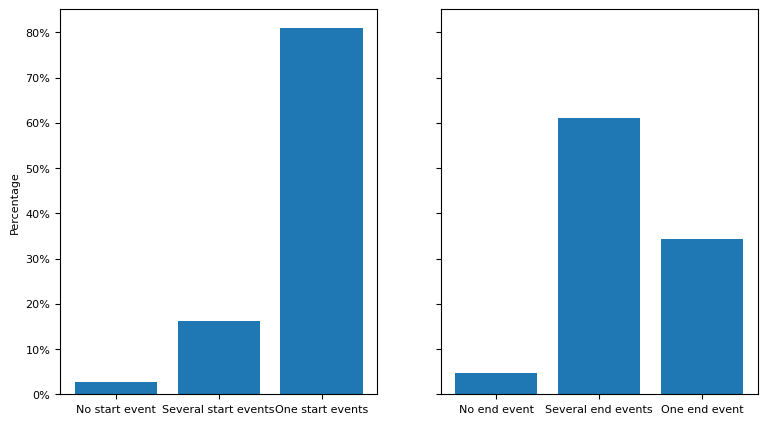

In [15]:
# Create two subplots for each type
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(9, 5), sharey=True)
plt.rcParams.update({'font.size': 8})

start_df = visual_df[visual_df['type'] == 'start']
ax1.bar(start_df['category'], start_df['pct'])
plt.xticks(fontsize=8)
ax1.set_ylabel('Percentage')
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# Plot for 'end' type
end_df = visual_df[visual_df['type'] == 'end']
ax2.bar(end_df['category'], end_df['pct'])
plt.xticks(fontsize=8)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))


# Show the plot
plt.show()